# Turing Machine & Deep Learning 2023
*Author: Satchit Chatterji (satchit.chatterji@gmail.com)*

## Lecture 2: Supervised ML (Classification)
> Today's question: How can I classify handwritten digits?

The MNIST dataset is a widely used benchmark dataset in machine learning and computer vision. It consists of a collection of 70,000 grayscale images of handwritten digits from 0 to 9. Each image is a 28x28 pixel square, making it a 28x28 matrix of numerical values. The MNIST dataset is often used for tasks such as digit recognition and serves as a fundamental dataset for developing and evaluating various image classification algorithms and models.

Today, we'll try to classify digits in this dataset using methods we learnt in the lecture.

#### Learning outcomes:
- Using benchmark data sets (MNIST)
- Reshaping inputs, outputs
- Logistic Regression
- Decision Trees
- Random Forests
- SVMs

# Loading MNIST

Because it is so popular, we can get an easily-accessible version via e.g. [TensorFlow](https://www.tensorflow.org/) that already comes with a test/train split.

In [63]:
# get dataset
from tensorflow.keras.datasets import mnist
# get common libraries
import matplotlib.pyplot as plt
import numpy as np

## Exploring MNIST

In [87]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

### Label distribution

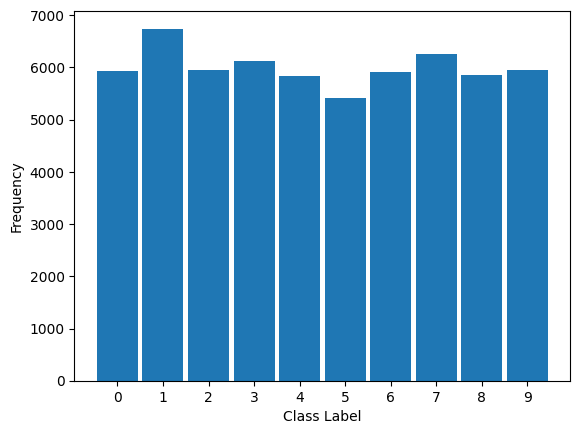

In [88]:
plt.hist(train_y, bins=10, rwidth=0.9)
plt.xticks(0.9*np.arange(10)+0.45, range(10))
plt.ylabel("Frequency")
plt.xlabel("Class Label")
plt.show()

### Exploring the images

In [91]:
print(train_X.shape)

(60000, 28, 28)


In [92]:
print(train_X[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

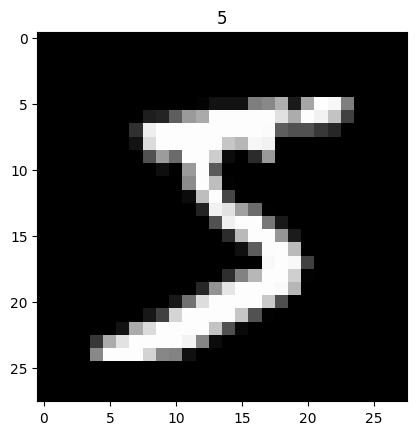

In [93]:
plt.imshow(train_X[0], cmap=plt.get_cmap('gray'))
plt.title(train_y[0])
plt.show()

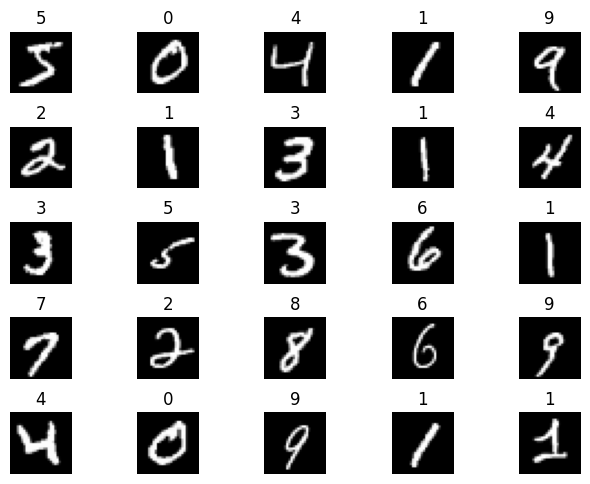

In [94]:
fig, axs = plt.subplots(5,5)
axs = axs.flatten()
fig.tight_layout(pad=0.3)

for i, ax in enumerate(axs):
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title(train_y[i])
    ax.axis("off")

### Reshaping MNIST

The ML algorithms used in this notebook usually expect the input to be a vector, and not a matrix. Thus, we need to reshape the samples into a single vector that is 784 dimensions long.

Later on, we will also need to reshape these back into single images, so we add a function for that too.

In [95]:
def flatten_mnist(samples):
    return samples.reshape((len(samples), 28*28))

def unflatten_mnist(image):
    return image.reshape(28,28)

train_X, test_X = flatten_mnist(train_X), flatten_mnist(test_X)

# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()  # create the logistic regression object
modelLR = modelLR.fit(train_X, train_y)  # fit on trainings data
modelLR.intercept_, modelLR.coef_  # estimated coefficients

C:\Users\satch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([-6.61940782e-05,  4.73003205e-05,  5.36508160e-05, -7.16795758e-05,
         9.66198956e-06,  3.51673745e-04, -2.41824976e-05,  1.13381647e-04,
        -3.43022959e-04, -7.05894069e-05]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

### Metrics

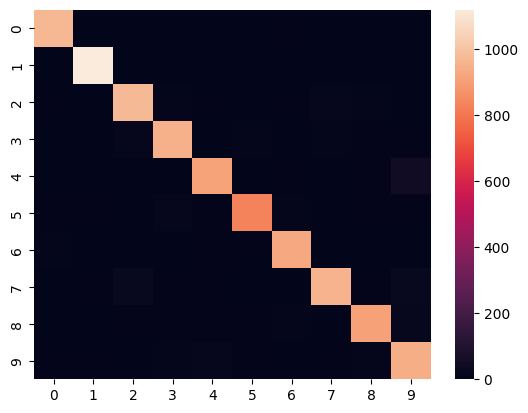

In [96]:
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns
sns.heatmap(cm(test_y, pred_y))
plt.show()

The raw confusion matrix for such an accurate baseline model doesn't seem to be too helpful. Instead, we can get the metrics computed directly for us.

In [97]:
# use a function from sklearn
from sklearn.metrics import classification_report

pred_y = modelLR.predict(test_X)
print("Logistic Regression")
print(classification_report(test_y, pred_y, digits=4))

Logistic Regression
              precision    recall  f1-score   support

           0     0.9544    0.9827    0.9683       980
           1     0.9678    0.9797    0.9737      1135
           2     0.9297    0.8973    0.9132      1032
           3     0.9034    0.9069    0.9051      1010
           4     0.9343    0.9267    0.9305       982
           5     0.9034    0.8700    0.8864       892
           6     0.9430    0.9499    0.9464       958
           7     0.9314    0.9251    0.9283      1028
           8     0.8673    0.8922    0.8796       974
           9     0.9120    0.9138    0.9129      1009

    accuracy                         0.9255     10000
   macro avg     0.9247    0.9244    0.9244     10000
weighted avg     0.9255    0.9255    0.9254     10000



For now, and what is common for balanced datasets, is to use accuracies as a good inital metric to see how your model is doing. So let's just compute them directly and display them for both the training and test set.

In [98]:
def get_accuracies(model, train_X, train_y, test_X, test_y):
    print("Training score:", model.score(train_X, train_y))
    print("Testing score: ", model.score(test_X, test_y))
    
get_accuracies(modelLR, train_X, train_y, test_X, test_y)

Training score: 0.9339166666666666
Testing score:  0.9255


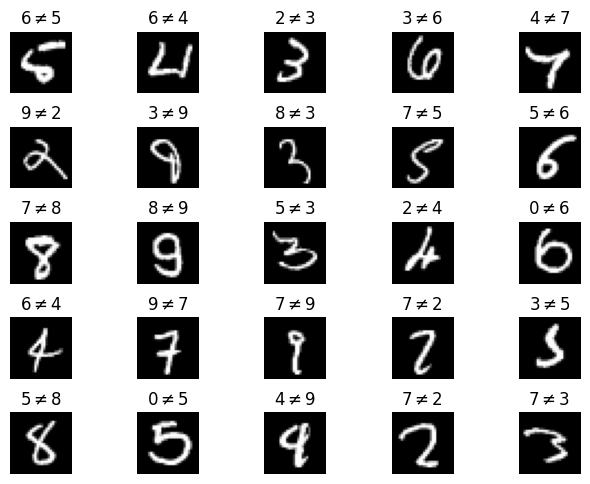

In [41]:
def show_incorrect_preds(pred_y, test_X, test_y):
    incorrect_idxs = pred_y!=test_y

    incorrect_pred_y = pred_y[incorrect_idxs]
    incorrect_test_X = test_X[incorrect_idxs]
    incorrect_test_y = test_y[incorrect_idxs]

    fig, axs = plt.subplots(5,5)
    axs = axs.flatten()
    fig.tight_layout(pad=0.3)

    for i, ax in enumerate(axs):
        ax.imshow(unflatten_mnist(incorrect_test_X[i]), cmap=plt.get_cmap('gray'))
        ax.set_title(fr"{incorrect_pred_y[i]}$\neq${incorrect_test_y[i]}")
        ax.axis("off")
        
show_incorrect_preds(pred_y, test_X, test_y)

# Decision Tree

In [49]:
from sklearn import tree

modelDT = tree.DecisionTreeClassifier(max_depth=10)
modelDT = modelDT.fit(train_X, train_y)

In [50]:
print("Decision Tree")
get_accuracies(modelDT, train_X, train_y, test_X, test_y)

Decision Tree
Training score: 0.8995333333333333
Testing score:  0.8658


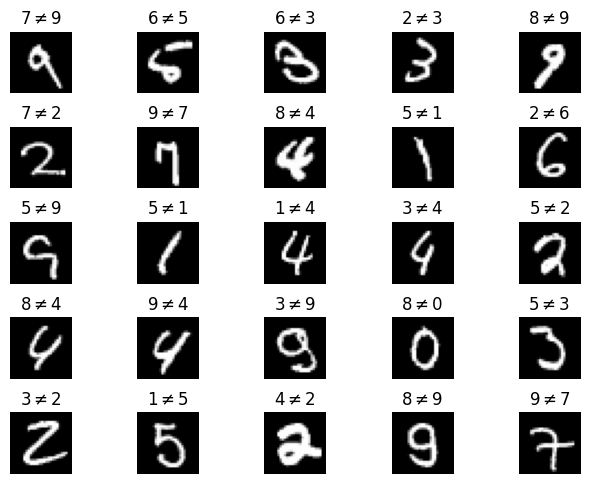

In [51]:
pred_y = modelDT.predict(test_X)
show_incorrect_preds(pred_y, test_X, test_y)

## Random Forests

In [53]:
from sklearn.ensemble import RandomForestClassifier as RFC

modelRFC = RFC(100, max_depth=10)
modelRFC = modelRFC.fit(train_X, train_y)

RandomForestClassifier(max_depth=10)

In [57]:
print("Random Forest")
get_accuracies(modelRFC, train_X, train_y, test_X, test_y)

Random Forest
Training score: 0.9644666666666667
Testing score:  0.9479


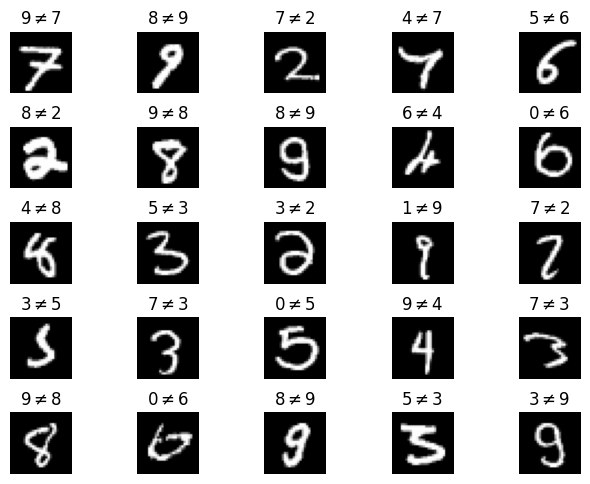

In [59]:
pred_y = modelRFC.predict(test_X)
show_incorrect_preds(pred_y, test_X, test_y)

# SVMs

SVMs come in a number of flavors with a number of hyperparameters you can play around with. Try them all out here! Keep in mind that since we have so many high-dimensional data points, this method can be excruitiatingly slow.

In [60]:
from sklearn.svm import SVC

modelSVC = SVC(kernel="rbf", C=1)
modelSVC = modelSVC.fit(train_X, train_y)

In [61]:
print("SVM")
get_accuracies(modelSVC, train_X, train_y, test_X, test_y)

SVM
Training score: 0.9899166666666667
Testing score:  0.9792


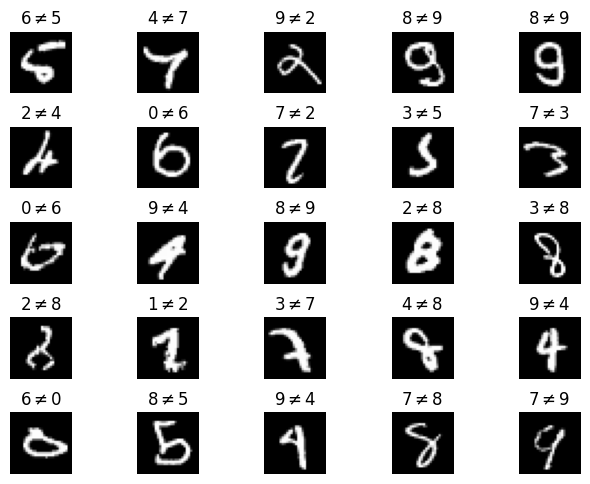

In [99]:
pred_y = modelSVC.predict(test_X)
show_incorrect_preds(pred_y, test_X, test_y)